In [1]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

### Contours
- basically contours are continuous lines or curves that covers boundary of an object in an image. (it's like segmentation line of and object)
- it used for premitive object detection

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line

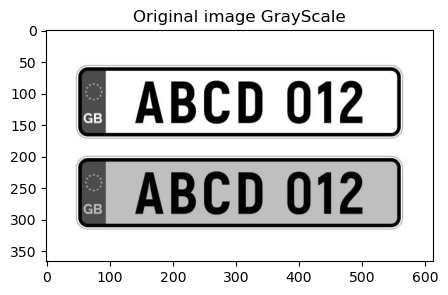

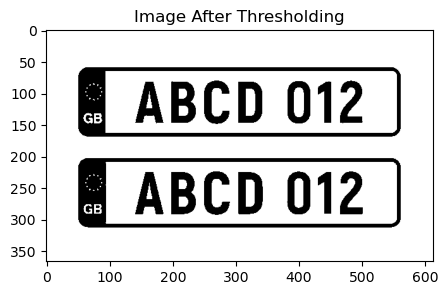

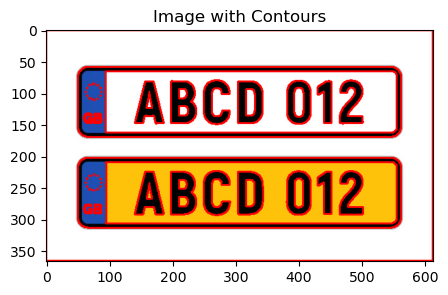

In [16]:
path = 'images/sample_number_plate.jpg'
img = cv2.imread(path)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(gray_img, "Original image GrayScale", 3)

# let's apply some thresholding to binarize the image to get accurate output of contours
_ , th_img = cv2.threshold(gray_img, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_image(th_img, "Image After Thresholding", 3)

# now use cv2.findContours(img, contours_retrival_mode,contours_approx_method)
contours, hierarchy = cv2.findContours(th_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# use cv2.drawContours(image_to_draw_contours, contours_lits, index, color, thickness)
cv2.drawContours(img, contours, -1, (0,0,255), 2)
show_image(img, "Image with Contours", 3)

# to find contours always make sure the object and background are inverted in term of color, i,e the bg should be black
# and the object should be white or vice versa. in case of opposite background use cv2.bitwise_not(img)
 # also always use image thresholding or binarization with contours to get accurate contours
# you can also use canny edge detector before passing the image to find contours to get most accurate otuput


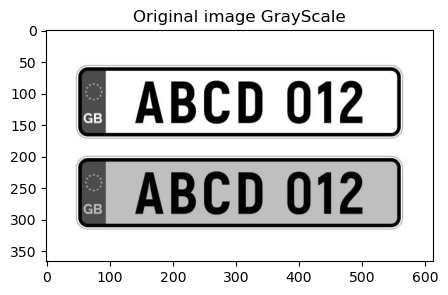

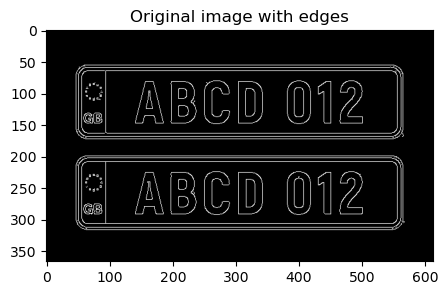

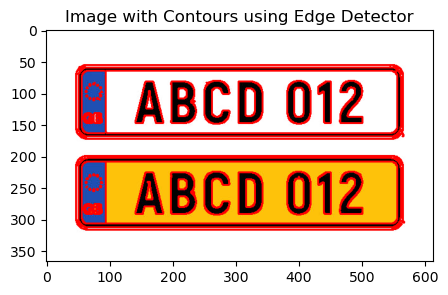

In [20]:
path = 'images/sample_number_plate.jpg'
img = cv2.imread(path)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(gray_img, "Original image GrayScale", 3)

edge_image = cv2.Canny(gray_img, 20, 200) # let's run the edge detection on the image
show_image(edge_image, "Original image with edges", 3)

# cv2.RETR_LIST - return all contours
# cv2.RETR_EXTERNAL - return external contours like in above image the inner boundary of 0 will be excluded.

contours, hierarchy = cv2.findContours(edge_image,cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0,0,255), 2)

show_image(img, "Image with Contours using Edge Detector", 3)
